## Aaditya Bhatia
February 21, 2019

## Part 1
A two layer neural network is trained on XOR gate

('Y one hot encoded ', array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]]))

---Starting Network Training ----



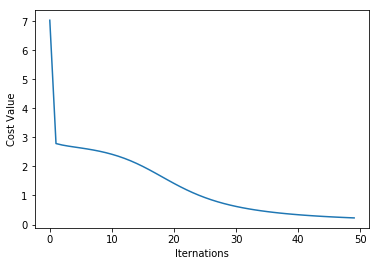

Trained weights are:
 w1:[[ 4.28417279  1.39931958 -0.62834681  4.42926404]
 [-4.51464766 -1.01915475  2.12309353 -4.25571969]],
 b1:[-2.38786302  0.45342268 -0.00307824  2.28433696],
 w1:[[-3.18971347  5.34355395]
 [ 0.80321566  0.26297101]
 [-0.88881877 -0.35521382]
 [ 3.07636915 -4.52594523]],
 b2:[-0.78314101  2.5884234 ]

---Network Training Done----



---Starting Testing----

Predicted[0 1 1 0], 
 actual [0 1 1 0]


---Testing Done----



In [36]:
import numpy as np
import random 
import matplotlib.pyplot as plt

class Network:

    def __init__(self, alpha, input_count, hidden_count, out_count):
        self.alpha = alpha
        self.input_count = input_count
        self.hidden_count = hidden_count
        self.out_count = out_count - 1
        
        self.W1 = np.random.randn(input_count, hidden_count)
        self.b1 = np.random.randn(hidden_count)
        self.W2 = np.random.randn(hidden_count, out_count)
        self.b2 = np.random.randn(out_count)
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def softmax(self,h):
        exph = np.exp(h)
        return exph / exph.sum(axis=1, keepdims=True)
    
    def init(self):
        '''
        This function does the following seuqentially:
        1. Randomly Initialize Weights and Biases
        2. Calls the train function that updates the weights
        3. Calls the predict function that tests the weights and biases
        '''
        
        
        # SETTING INPUT FOR XOR GATE
        X1 = np.array([0,0])
        X2 = np.array([0,1])
        X3 = np.array([1,0])
        X4 = np.array([1,1])
        X = np.vstack([X1, X2, X3, X4])

        y = np.array([0,1,1,0])
        Y_encoded = np.eye( 2, dtype=int)[y]
        print ("Y one hot encoded ", Y_encoded)
        
        # TRAINING THE NETWORK AND SAVING THE WEIGHTS
        print ("\n---Starting Network Training ----\n")
        self.train(X,Y_encoded)
        print ("\n---Network Training Done----\n\n")
        
        # TESTING THE NETWORK WITH THE TRUTH TABLE OF XOR
        print ("\n---Starting Testing----\n")
        Y_pred = self.predict(X)
        print ("Predicted{}, \n actual {}\n".format(Y_pred, y))
        print ("\n---Testing Done----\n")
        
            
    def train(self,X, Y_encoded):
        '''
        This function performs the following: 
        1. Forward Propogation
        2. Computes partial derivatives for w1,w2,b1,b2
        3. Updates the weights 
        4. Plots the cost function with respect to iterations
        '''
        costs = []
        for epoch in range(5000):
            # forward pass
            h1 = self.sigmoid(X.dot(self.W1) + self.b1) 
            y_hat = self.softmax(h1.dot(self.W2) + self.b2)

            # backward pass
            delta2 = y_hat - Y_encoded
            delta1 = (delta2).dot(self.W2.transpose()) * h1 * (1 - h1)

            self.W2 -= self.alpha * h1.T.dot(delta2)
            self.b2 -= self.alpha * (delta2).sum(axis=0)

            self.W1 -= self.alpha * X.T.dot(delta1)
            self.b1 -= self.alpha * (delta1).sum(axis=0)

            
            if epoch % 100 == 0:
                loss = np.sum(-Y_encoded * np.log(y_hat))
                costs.append(loss)
        
        # Plotting the cost curve
        fig, ax = plt.subplots()
        plt.plot(costs)
        ax.set_ylabel('Cost Value')
        ax.set_xlabel('Iternations')
        plt.show()
        
        print ("Trained weights are:\n w1:{},\n b1:{},\n w1:{},\n b2:{}".format(self.W1, self.b1, self.W2, self.b2))
    
    def predict(self,X):
        h1 = self.sigmoid(X.dot(self.W1) + self.b1) 
        y_hat = self.softmax(h1.dot(self.W2) + self.b2) 
        Y_hat = y_hat.argmax(axis=1)
        return (Y_hat) # Converting to one hot encoded

mynetwork = Network(0.01, 2, 4, 2)
mynetwork.init()

## Part 2
MNIST dataset is downloaded. 
Checking raw data.

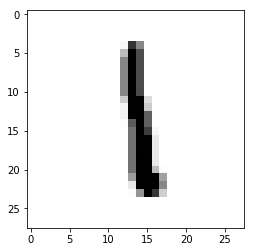

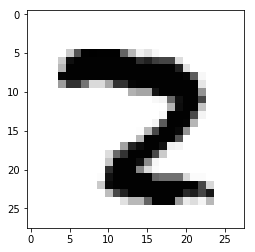

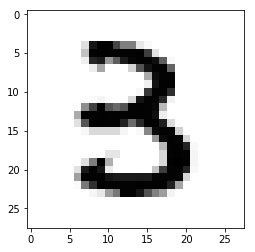

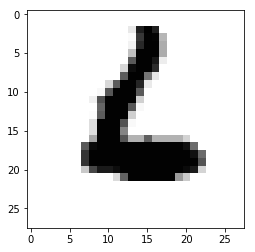

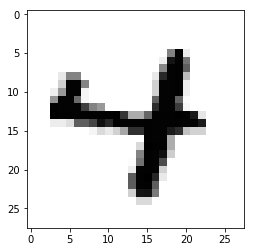

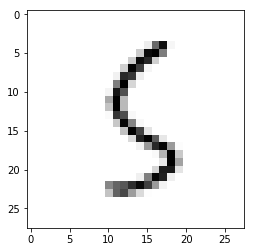

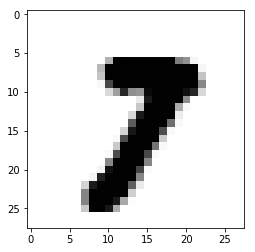

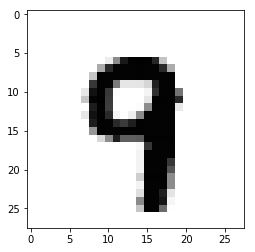

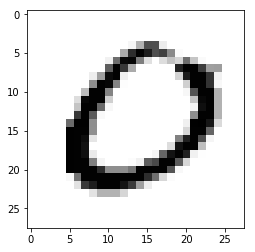

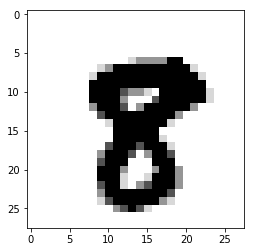

In [87]:
import scipy.io as sio
import numpy as np
import random

from sklearn.datasets.base import get_data_home 

df = sio.loadmat("mnist-original.mat")                 #If data saved in the same directory as the ipynb file
#df = sio.loadmat(get_data_home()+"/mnist-original.mat") #If data saved in sklearn directory

Y = df['label'].transpose()
X = df['data'].transpose()


temp = []
X_ind = []
for i in range(100):    
    r=random.randint(0,len(X))   #obtaining a random sample from the training data
    if Y[r][0] not in temp:
        temp.append(Y[r][0])
        X_ind.append(X[r])

for img in X_ind:
    plt.imshow(img.reshape(28, 28),cmap='Greys')
    plt.show()

## Splitting the data using 10 fold cross validation

In [88]:
n_splits=10

# Randomly shffling data
combined = np.concatenate((X,Y), axis = 1)
np.random.shuffle(combined)

np.random.seed(101)
x_, y_ = np.split(combined,[X.shape[1]], axis = 1)
y_ = y_.astype(int)

# Dividing the data into 10 folds
yInstances = []
XList = np.split(x_, 10)
YList = np.split(y_,10)



X_train = np.zeros((1,X.shape[1]))
Y_train = np.zeros((1,1))

for i, x in enumerate(XList):
    yInstances.append(np.bincount(YList[i].flatten()))
   
    if (i <8):
        # Merging the first 8 together
        X_train = np.vstack((X_train, XList[i]))
        Y_train = np.vstack((Y_train, YList[i]))

X_test = XList[8]
Y_test = YList[8]
        
X_cv = XList[9]
Y_cv = YList[9]

print ('Dimensions of X_train={}, X_Test={}, X_Validation={}'.format(X_train.shape, X_test.shape, X_cv.shape))
print ('Dimensions of Y_train={}, Y_Test={}, Y_Validation={}'.format(Y_train.shape, Y_test.shape, Y_cv.shape))

Dimensions of X_train=(56001L, 784L), X_Test=(7000L, 784L), X_Validation=(7000L, 784L)
Dimensions of Y_train=(56001L, 1L), Y_Test=(7000L, 1L), Y_Validation=(7000L, 1L)


### Checking the data distributions for each split.

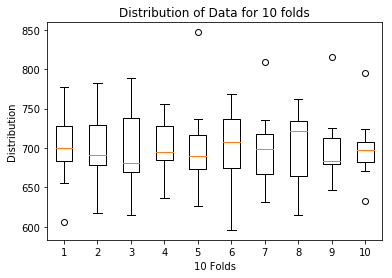

In [22]:
import matplotlib.pyplot as plt
# yInstances

fig, ax = plt.subplots()
ax.boxplot(yInstances, vert = True , showfliers = True)
ax.set_title('Distribution of Data for 10 folds')
ax.set_xlabel('10 Folds')
ax.set_ylabel('Distribution')
plt.show()

### Median is centered about 700

The graph shows the distribution of each number within all the 10 folds of dataset. 
The box plot shows data is centered about the median value (around 700 instances per digit per fold).

Size of each fold = 7000

Number of digits(0 to 9) per fold = 10

Distribution of each digit = 7000/10 = 700

## Part 3
### Training the neural network for MNIST dataset

C:\Users\bhati\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch 0, validation cost difference from previous epoch:123351
Epoch 1, validation cost difference from previous epoch:123351
Epoch 2, validation cost difference from previous epoch:38258
Epoch 3, validation cost difference from previous epoch:53302
Epoch 4, validation cost difference from previous epoch:41404
Epoch 5, validation cost difference from previous epoch:21446
Epoch 6, validation cost difference from previous epoch:13170
Epoch 7, validation cost difference from previous epoch:8983
Epoch 8, validation cost difference from previous epoch:6920
Epoch 9, validation cost difference from previous epoch:5669
Epoch 10, validation cost difference from previous epoch:1465
Epoch 11, validation cost difference from previous epoch:513
Epoch 12, validation cost difference from previous epoch:513
Epoch 13, validation cost difference from previous epoch:425
Epoch 14, validation cost difference from previous epoch:375
Epoch 15, validation cost difference from previous epoch:214
Epoch 16, vali

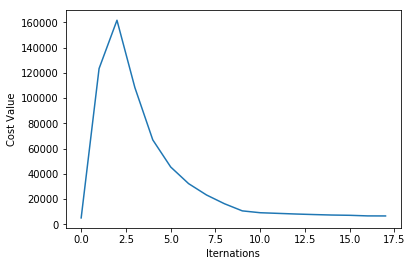

In [92]:
import time

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

out_count = len(np.bincount(Y_test.reshape(Y_test.shape[0],)))
hidden_count = 100
input_count = len(X_test[1])

#one hot encoding
Y_encoded = np.eye( out_count, dtype=int)[Y_train.astype(int).reshape(len(Y_train), )]
Y_cv_en = np.eye( out_count, dtype=int)[Y_cv.astype(int).reshape(len(Y_cv), )]


# randomly initialize weights
W1 = np.random.randn(input_count, hidden_count)
b1 = np.random.randn(hidden_count)
W2 = np.random.randn(hidden_count, out_count)
b2 = np.random.randn(out_count)

costs = []
alpha = 0.0001
X = X_train

t0 = time.time()

# trainig
cost_validation = [0]
costs = []
for epoch in range(1000):
    # forward pass
    h1 = sigmoid(X.dot(W1) + b1) 
    y_hat = softmax(h1.dot(W2) + b2) # Y = softmax(Z2)

    # backward pass
    delta2 = y_hat - Y_encoded
    delta1 = (delta2).dot(W2.transpose()) * h1 * (1 - h1)
    
    W2 -= alpha * h1.T.dot(delta2)
    b2 -= alpha * (delta2).sum(axis=0)

    W1 -= alpha * X.T.dot(delta1)
    b1 -= alpha * (delta1).sum(axis=0)
        
    costs.append(int(np.sum(-Y_cv_en * np.log(y_hat_c))))
    
    # testing on the validation set for early stopping
    h1_c = sigmoid(X_cv.dot(W1) + b1) 
    y_hat_c = softmax(h1_c.dot(W2) + b2) 
    
    val_c =  int(np.sum(-Y_cv_en * np.log(y_hat_c))) # validation cost
    cost_validation.append(val_c)
    diff =  abs(cost_validation[epoch] - cost_validation[epoch-1])
    print ("Epoch {}, validation cost difference from previous epoch:{}".format(epoch, diff))
    if (diff < 50): # Delemitor condition
        break
    
print ("\n Training took {} minutes ".format((time.time() - t0)/60.0))

fig, ax = plt.subplots()
plt.plot(costs)
ax.set_ylabel('Cost Value')
ax.set_xlabel('Iternations')
plt.show()

In [90]:
#predict on training set
def predict(X):
    h1 = sigmoid(X.dot(W1) + b1) 
    y_hat = softmax(h1.dot(W2) + b2) # Y = softmax(Z2)
    return (y_hat) # Converting to one hot encoded


#plt.imshow(X_test[0].reshape(28, 28),cmap='Greys')

y_predicted = predict(X_test)
Y_predicted = y_predicted.argmax(axis=1)

(Y_predicted==Y_test).sum() 

acc = np.count_nonzero(Y_predicted.reshape(len(Y_predicted), 1) == Y_test) / (len(Y_test) + 0.0)
print ("The testing accuracy is {} %".format(acc * 100))

The testing accuracy is 75.6714285714 %


C:\Users\bhati\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


## Additional Notes

Instead of using softmax and negative log likelihood, if we use sigmoid with MLE, our network would not train for the class corresponding to the one hot encoded y classes, as softmax distributes the probabilities for each output nodes. The probabilities for 0,1.. will be p(y0/x) , p(y1/x).. etc. The sum of probabilities for each of output softmax nodes will be 1. This helps us by increasing the function value of one class and highly reducing values for the other classes. This will not happen with sigmoid activation. With sigmoid activation, each node at the output layer will predict a high value (which is not distributed based on probabilities), which will not allow the network to be trained for specifically for the one-hot encoded class. 
Hence, we use softmax for multiclass classification and sigmoid for binary classification.
